# Fetal Health Classification Data Analysis

- Read in data
- Data Cleaning
- EDA



## Read In Data

In [52]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 300)
% matplotlib inline

plt.style.use('seaborn')

In [34]:
import os
os.path.isfile('../Phase_3_Project/data.csv/fetal_health.csv')

True

In [3]:
!ls -l

total 10496
-rw-r--r--  1 heymanjake  staff     2162 Nov  9 13:22 README.md
drwxr-xr-x@ 4 heymanjake  staff      128 Nov  9 12:39 data.csv
-rw-r--r--  1 heymanjake  staff  5365916 Nov  9 16:40 fetal_heatlh_data_analysis.ipynb


In [4]:
#Read in UCI Heart Disiease Databasae
df = pd.read_csv('../Phase_3_Project/data.csv/fetal_health.csv')


In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Data Cleaning

In [6]:
#Check for null Values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
#Check Shape of dataframe
df.shape

(2126, 22)

In [8]:
#Data types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [9]:
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

In [10]:
df.fetal_health.value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

## EDA

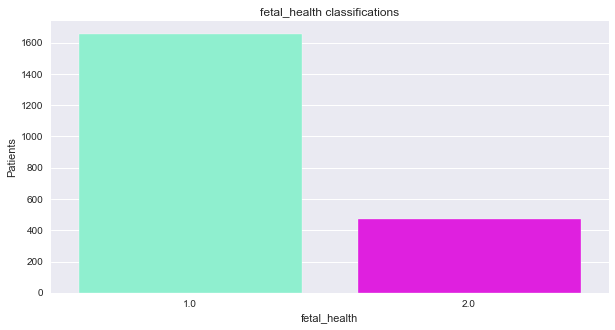

In [11]:
# Check the Distribution of target data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['fetal_health'], alpha = 1, palette= ['aquamarine','magenta','mediumblue'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

In [37]:
X = df.drop('fetal_health',axis=1)
y= df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
ypred_knn = knn.predict(X_test)
print("Accuracy"+ str(metrics.accuracy_score(y_test,ypred_knn)))
print('recall'+ str(metrics.recall_score(y_test,ypred_knn)))
print('F1 Score'+ str(metrics.f1_score(y_test,ypred_knn)))

Accuracy0.9210526315789473
recall0.9682151589242054
F1 Score0.9496402877697842


In [45]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/heymanjake/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
ypred_lr = lr.predict(X_test)
print("Accuracy"+ str(metrics.accuracy_score(y_test,ypred_lr)))
print('recall'+ str(metrics.recall_score(y_test,ypred_lr)))
print('F1 Score'+ str(metrics.f1_score(y_test,ypred_lr)))

Accuracy0.8872180451127819
recall0.9462102689486552
F1 Score0.9280575539568346


In [49]:
tree = DecisionTreeClassifier()

tree = tree.fit(X_train,y_train)

y_pred_tree = tree.predict(X_test)

print("Accuracy"+ str(metrics.accuracy_score(y_test,y_pred_tree)))
print('recall'+ str(metrics.recall_score(y_test,y_pred_tree)))
print('F1 Score'+ str(metrics.f1_score(y_test,y_pred_tree)))

Accuracy0.9210526315789473
recall0.941320293398533
F1 Score0.9482758620689655


In [51]:
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)

print("Accuracy"+ str(metrics.accuracy_score(y_test,rfc_preds)))
print('recall'+ str(metrics.recall_score(y_test,rfc_preds)))
print('F1 Score'+ str(metrics.f1_score(y_test,rfc_preds)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Accuracy0.8947368421052632
recall0.9755501222493888
F1 Score0.9344262295081969


In [12]:
# value counts for having heart disease or not
df['fetal_health'].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

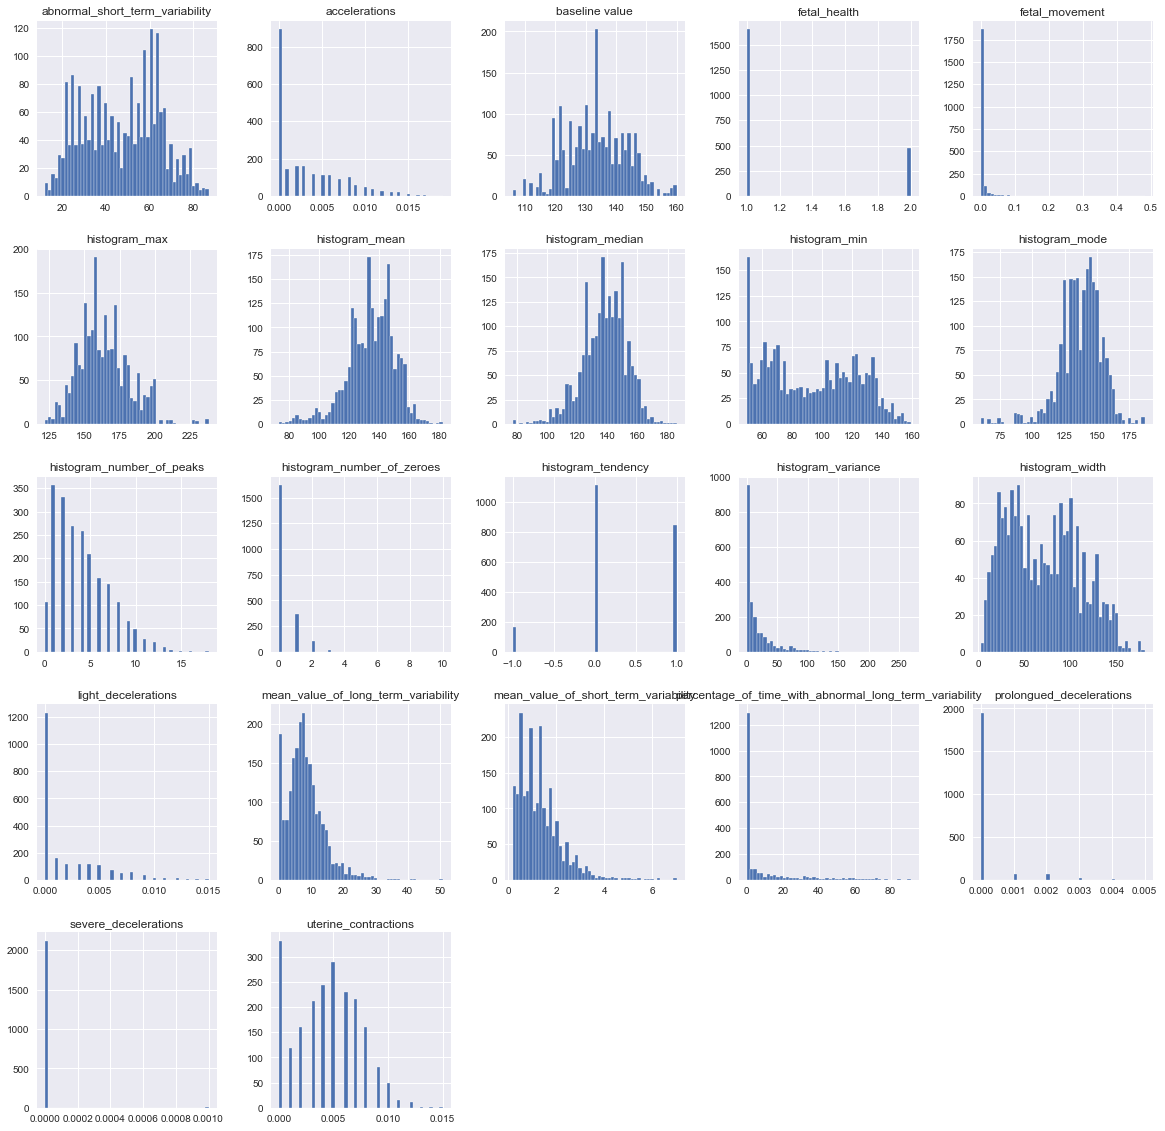

In [13]:
# Histogram of all featrues
df.hist(bins=50, figsize=(20,20))
plt.show()

In [14]:
#check value counts of acceleration feature
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [53]:
# bin accelerations by quantile
df['quantile_acceleration'] = pd.qcut(df['accelerations'],
                                     q=[0,0.25,.75,1], labels = False,
                                     duplicates='drop')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration,uterine_cont_per_min
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0,0.00
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0,0.36
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0,0.48
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0,0.48
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,1,0.48


Here we created a new feature quantile_accelerations which binned acceleration into catagories of percent value increase.  The quantiles where set at 0,.25,.75, and 1.

In [16]:
#check value counts of uterine_contractions
df.uterine_contractions.value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [17]:
#create new column of contractions per minute
df['uterine_cont_per_min'] = df['uterine_contractions']*60

In [18]:
df.uterine_cont_per_min.value_counts()

0.00    332
0.30    290
0.24    244
0.36    231
0.42    216
0.18    212
0.12    160
0.48    160
0.06    118
0.54     82
0.60     49
0.66     16
0.72     11
0.84      2
0.78      2
0.90      1
Name: uterine_cont_per_min, dtype: int64

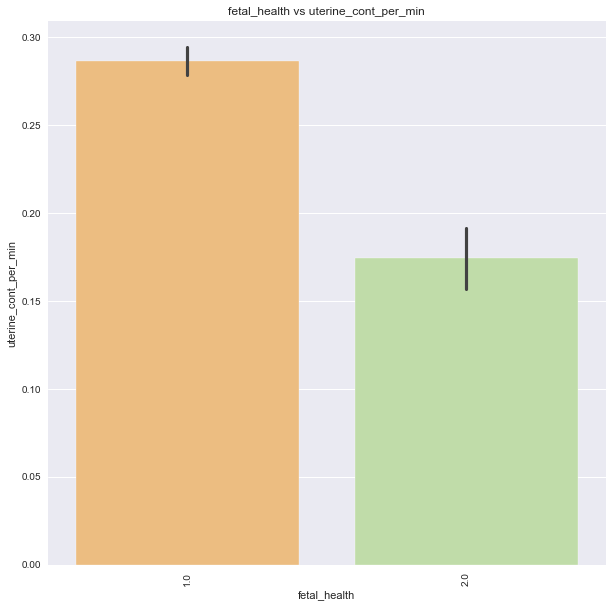

In [19]:
#bar plot looking at the class
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='uterine_cont_per_min',
            data = df, 
            palette = 'Spectral').set_title('fetal_health vs uterine_cont_per_min')
plt.xticks(rotation='vertical')
plt.show()

In [20]:
df.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    60
64.0    58
63.0    58
        ..
83.0     4
14.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

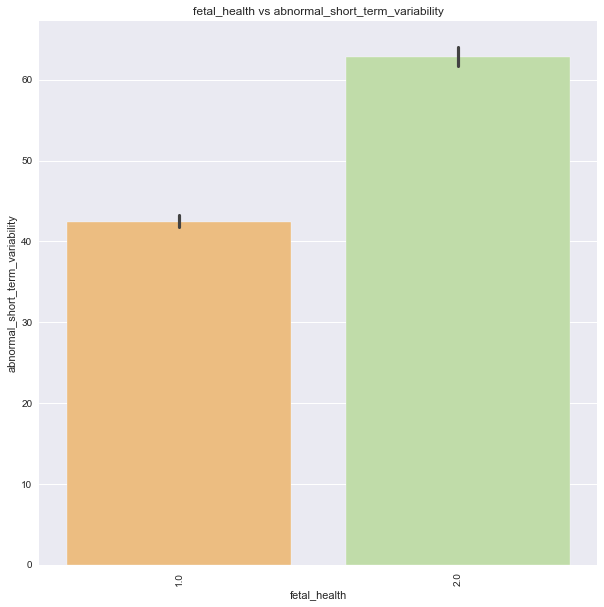

In [21]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='abnormal_short_term_variability',
            data = df, 
            palette = 'Spectral').set_title('fetal_health vs abnormal_short_term_variability')
plt.xticks(rotation='vertical')
plt.show()

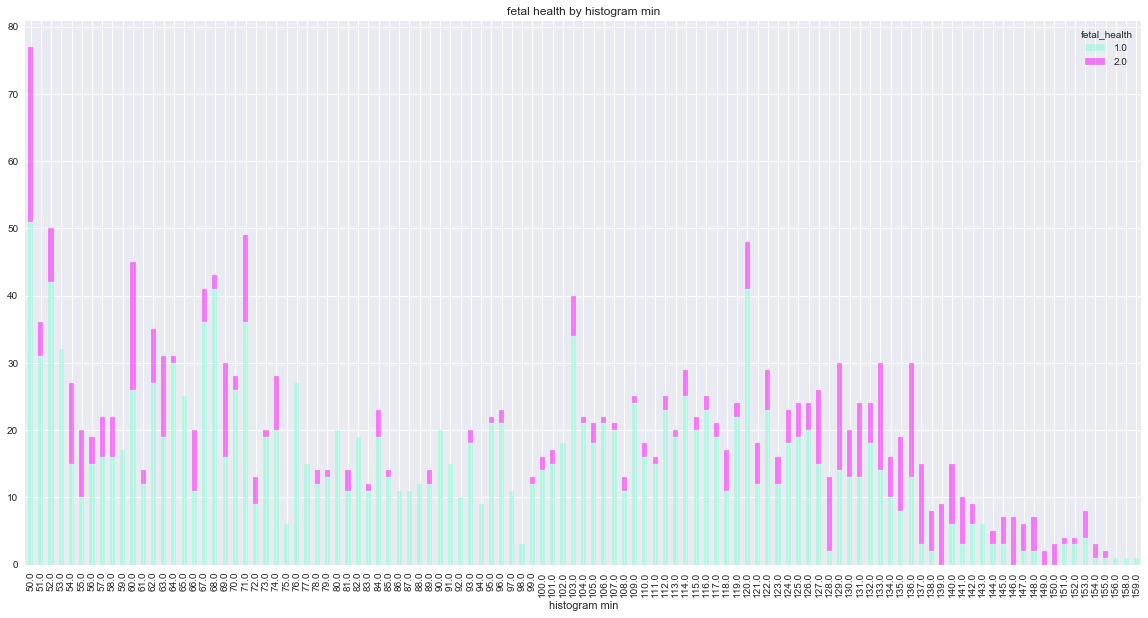

In [22]:
#Histogram showing the histogram distrubition values of minimum FHR by the three Classes
histogram_min = df.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram min',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram min')

plt.show()

In [23]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

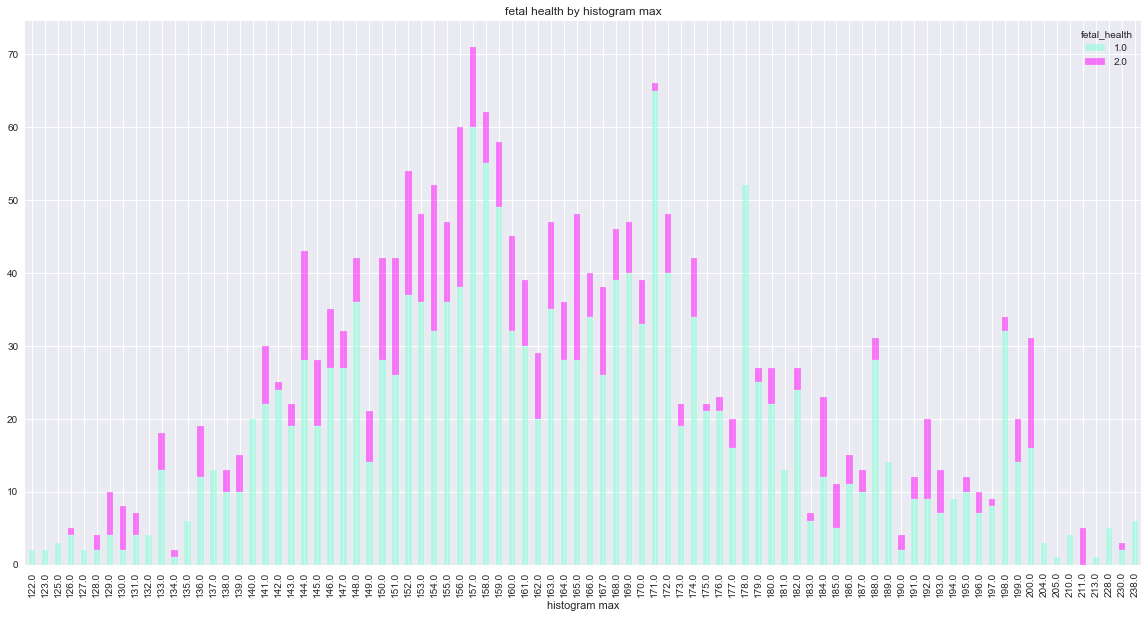

In [24]:
# #Histogram showing the histogram distribution values of maximum FHR by the three Classes
histogram_min = df.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram max',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram max')

plt.show()

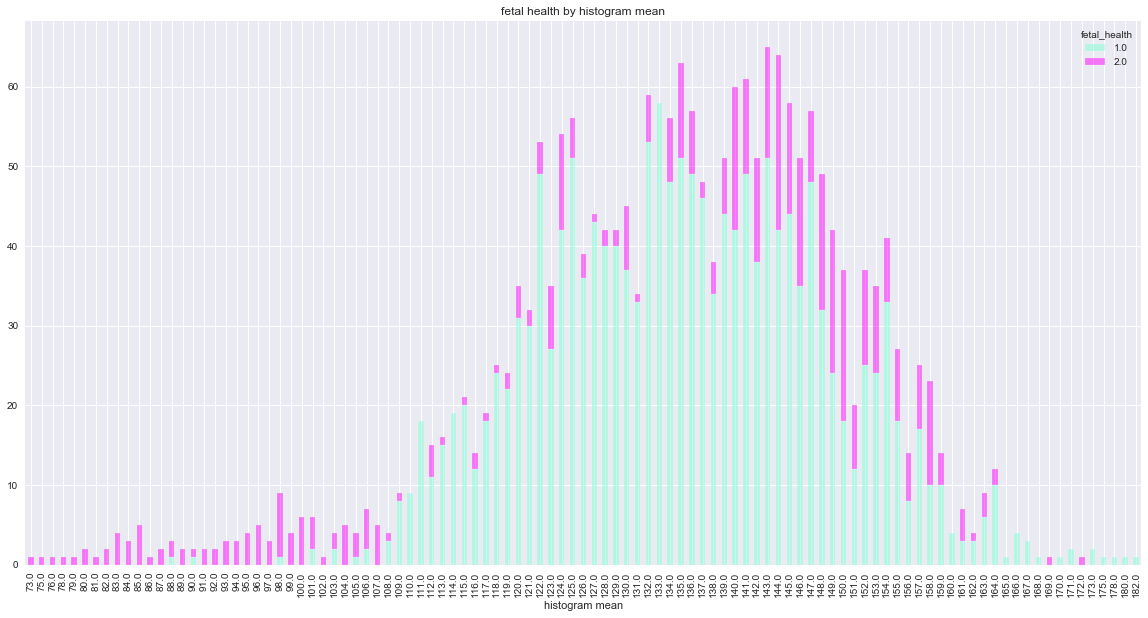

In [25]:
# #Histogram showing the histogram distribution values of average FHR by the three Classes
histogram_min = df.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram mean',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean')

plt.show()

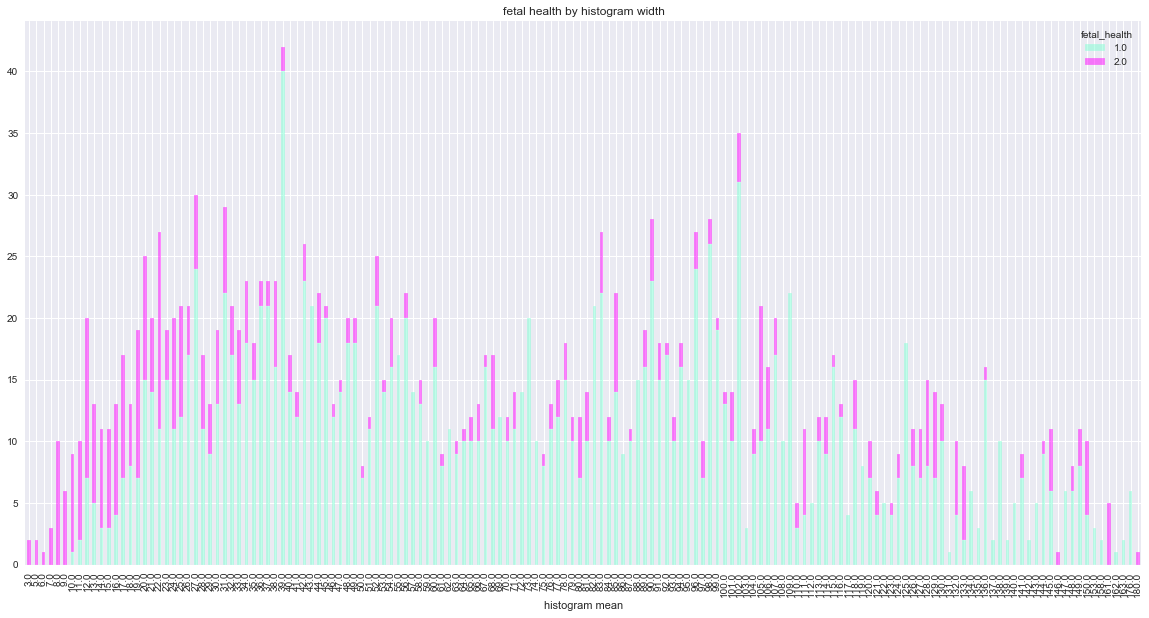

In [26]:
#
histogram_min = df.groupby(['histogram_width','fetal_health']).histogram_width.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram width',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean')

plt.show()

In [27]:
df.head(1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration,uterine_cont_per_min
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0,0.0


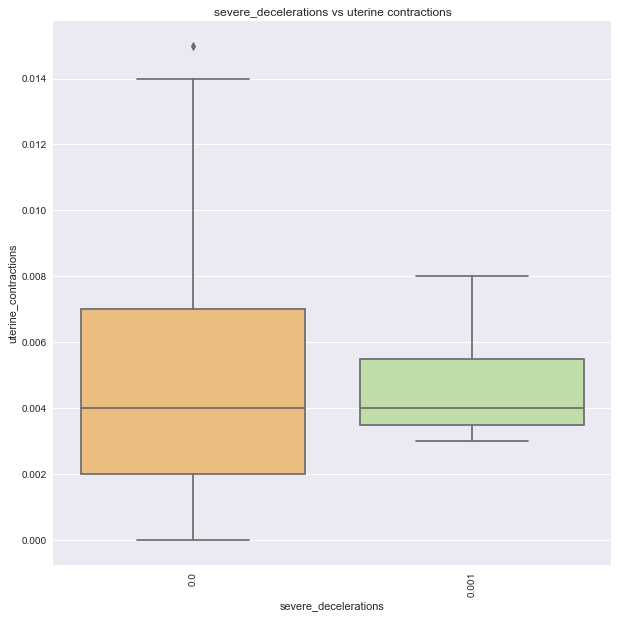

In [28]:
# Boxplot of uter
plt.figure(figsize = (10,10))
sns.boxplot(x = 'severe_decelerations', 
            y ='uterine_contractions',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs uterine contractions')
plt.xticks(rotation='vertical')
plt.show()

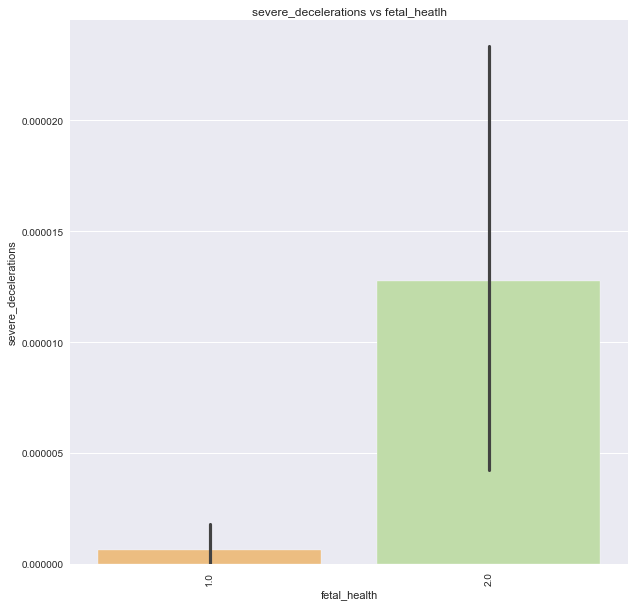

In [29]:
#boxplot of fetal health vs sever deceleration
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='severe_decelerations',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

- create 

In [30]:
fetal_health_pred = df.drop('fetal_health', axis =1)

In [31]:
#pd.plotting.scatter_matrix(fetal_health_pred,figsize= (50,50));
#plt.show()

In [32]:
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration,uterine_cont_per_min
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.251875,-0.038281,-0.146373
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.394760,0.836249,0.089674
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.060974,0.023206,-0.068779
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.263639,0.068365,1.000000
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,-0.032889,-0.082601,0.285079
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.087967,-0.028898,0.006788
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.340554,-0.115256,0.077036
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.493391,-0.176854,-0.232811
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.207717,0.150557,0.289679
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.489400,-0.258024,-0.306608


In [33]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration,uterine_cont_per_min
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.221543,0.201787,0.261985
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.415383,0.401429,0.176764
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,0.000000,0.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000,0.000000,0.120000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000,0.000000,0.240000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000,0.000000,0.420000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,2.000000,1.000000,0.900000
